## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import benchmark as bm
import suite

## Reload (if necessary)

In [7]:
from importlib import reload

bm = reload(bm)
suite = reload(suite)

## Benchmark

In [8]:
bench_iters = 10
dims = 2

# Get benchmarker for rastrigin
bench = bm.all_benches['rosenbrock2D']

##########################################################################################

# Vanilla PSO
opter1 = suite.optimizers['vanilla']
evaluator1 = bench(opter1)
print(f"Benchmarking Vanilla PSO on {evaluator1}")
spec1 = evaluator1.eval(bench_iters)


##########################################################################################


# Adaswarm
opter2 = suite.optimizers['adaswarm'].get_plain_swarm()
evaluator2 = bench(opter2)
print(f"\nBenchmarking Adaswarm on {evaluator2}")
spec2 = evaluator2.eval(bench_iters)

##########################################################################################

# Reverse-Informed PSO
opter3 = suite.optimizers['rilcpso']
evaluator3 = bench(opter3)
print(f"\nBenchmarking Reverse-Informed PSO on {evaluator3}")
spec3 = evaluator3.eval(bench_iters)

Benchmarking Vanilla PSO on Rosenbrock2D 2-D
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10

Benchmarking Adaswarm on Rosenbrock2D 2-D
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10

Benchmarking Reverse-Informed PSO on Rosenbrock2D 2-D
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10


## Printing Overall specs

In [9]:
keys = [k for k in spec1['ospec'].keys() if k != 'conv_curves']
specs = {
    'vanilla'      : spec1['ospec'],
    'adaswarm'     : spec2['ospec'],
    'ripso'        : spec3['ospec']
}

for k in keys :
    for pso_type, spec in specs.items() :
        print("{:>10} {:>25} {:>25}".format(pso_type, k, spec[k]))
    print("\n", end="")

   vanilla                mean_iters                     754.3
  adaswarm                mean_iters                    1864.1
     ripso                mean_iters                     656.0

   vanilla               mean_minima    4.0255250909022223e-10
  adaswarm               mean_minima          3.72063293146551
     ripso               mean_minima      3.67485319050341e-11

   vanilla         mean_mean_fitness     0.0011541341979718997
  adaswarm         mean_mean_fitness        15292.926348508397
     ripso         mean_mean_fitness     0.0009007312840583053

   vanilla              mean_no_conv                      25.0
  adaswarm              mean_no_conv                      23.7
     ripso              mean_no_conv                      25.0

   vanilla              mean_min_err    4.0255250909022223e-10
  adaswarm              mean_min_err          3.72063293146551
     ripso              mean_min_err      3.67485319050341e-11

   vanilla           mean_argmin_err        1.4142

## Print Worst and Best Convergence Curve

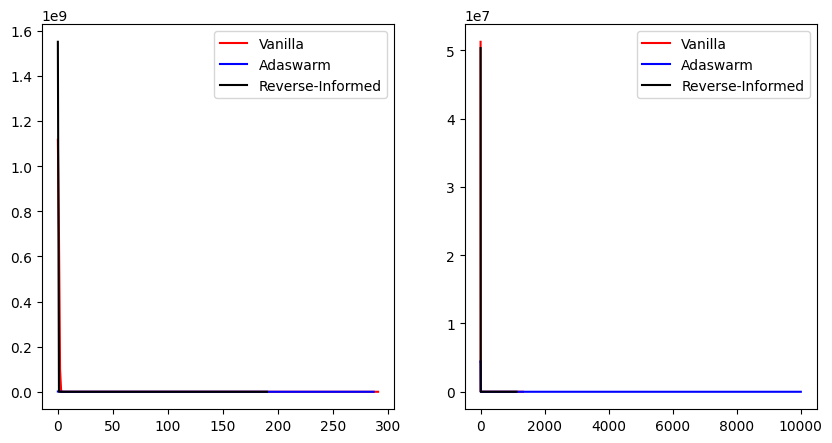

In [10]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios' : [1, 1]})
fig.set_figheight(5)
fig.set_figwidth(10)

ccb1, ccw1 = spec1['ospec']['conv_curves']
ccb2, ccw2 = spec2['ospec']['conv_curves']
ccb3, ccw3 = spec3['ospec']['conv_curves']

ax[0].plot(np.arange(len(ccb1)), ccb1, 'r', label='Vanilla')
ax[0].plot(np.arange(len(ccb2)), ccb2, 'b', label='Adaswarm')
ax[0].plot(np.arange(len(ccb3)), ccb3, 'k', label='Reverse-Informed')
ax[0].legend()

ax[1].plot(np.arange(len(ccw1)), ccw1, 'r', label='Vanilla')
ax[1].plot(np.arange(len(ccw2)), ccw2, 'b', label='Adaswarm')
ax[1].plot(np.arange(len(ccw3)), ccw3, 'k', label='Reverse-Informed')
ax[1].legend()